# MNIST

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

import functools

from pred_diff import preddiff, shapley
from pred_diff.imputers import vae_impute, general_imputers
from pred_diff.tools import utils_mnist as ut_mnist
from pred_diff.tools import init_plt
from main_MNIST import generate_superpixel_slic_mnist, visualize_mnist_attributions, calculate_attributions_mnist

%load_ext autoreload
%autoreload 2

In [2]:
# paper style
# init_plt.update_rcParams(fig_width_pt=234.88*2)

# default
plt.style.use('default')


In [17]:
from dataclasses import dataclass

@dataclass
class Args:
    n_imputations: int  = 1
    n_images: int = 2
    imputer: str = 'TrainSet'        # choices=['TrainSet', 'VAEImputer']
    explainer: str = 'Shapley'      # choices=['PredDiff', 'Shapley']
    n_segments: int = 25            # approximately number of superpixel
    n_shapley_coalitions: int = 200
    
    # __internal__ parameters
    compactness: float = 0.5           # hyperparameter for SLIC
    n_group: int = 200
    interaction: bool = True
    random_interaction_pixel: bool = False
    n_interaction_pixel: int = 1   # for how many of the most relevant segments interactions will be evaluated

args = Args()

In [18]:
dict_mnist = calculate_attributions_mnist(args=args)

load model
image 0 of 2 total


shapley values:   0%|          | 0/23 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:   4%|▍         | 1/23 [00:03<01:14,  3.38s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:   9%|▊         | 2/23 [00:06<01:10,  3.37s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  13%|█▎        | 3/23 [00:10<01:06,  3.34s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  17%|█▋        | 4/23 [00:13<01:03,  3.33s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  22%|██▏       | 5/23 [00:16<00:59,  3.32s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  26%|██▌       | 6/23 [00:19<00:55,  3.25s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  30%|███       | 7/23 [00:22<00:51,  3.21s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  39%|███▉      | 9/23 [00:29<00:43,  3.14s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  43%|████▎     | 10/23 [00:32<00:40,  3.09s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  48%|████▊     | 11/23 [00:35<00:37,  3.09s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  52%|█████▏    | 12/23 [00:38<00:35,  3.18s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  57%|█████▋    | 13/23 [00:41<00:31,  3.15s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  61%|██████    | 14/23 [00:44<00:28,  3.16s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  65%|██████▌   | 15/23 [00:47<00:24,  3.10s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  70%|██████▉   | 16/23 [00:50<00:21,  3.10s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  78%|███████▊  | 18/23 [00:57<00:16,  3.24s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  83%|████████▎ | 19/23 [01:00<00:12,  3.14s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  87%|████████▋ | 20/23 [01:03<00:09,  3.11s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  96%|█████████▌| 22/23 [01:09<00:03,  3.07s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:   0%|          | 0/22 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:   5%|▍         | 1/22 [00:06<02:09,  6.17s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:   9%|▉         | 2/22 [00:12<02:00,  6.03s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  14%|█▎        | 3/22 [00:18<01:55,  6.06s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  18%|█▊        | 4/22 [00:24<01:48,  6.05s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  23%|██▎       | 5/22 [00:30<01:42,  6.03s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  32%|███▏      | 7/22 [00:42<01:31,  6.09s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  36%|███▋      | 8/22 [00:48<01:26,  6.19s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  41%|████      | 9/22 [00:55<01:20,  6.23s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  45%|████▌     | 10/22 [01:01<01:13,  6.16s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  50%|█████     | 11/22 [01:06<01:06,  6.07s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  55%|█████▍    | 12/22 [01:13<01:00,  6.08s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  59%|█████▉    | 13/22 [01:19<00:55,  6.20s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  64%|██████▎   | 14/22 [01:25<00:49,  6.21s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  68%|██████▊   | 15/22 [01:31<00:43,  6.18s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  73%|███████▎  | 16/22 [01:38<00:37,  6.17s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  77%|███████▋  | 17/22 [01:44<00:30,  6.20s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  82%|████████▏ | 18/22 [01:50<00:24,  6.21s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  86%|████████▋ | 19/22 [01:57<00:18,  6.28s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  95%|█████████▌| 21/22 [02:09<00:06,  6.19s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index: 100%|██████████| 22/22 [02:15<00:00,  6.16s/it]


image 1 of 2 total


shapley values:   0%|          | 0/23 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:   4%|▍         | 1/23 [00:03<01:10,  3.20s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:   9%|▊         | 2/23 [00:06<01:05,  3.13s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  13%|█▎        | 3/23 [00:09<01:03,  3.17s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  17%|█▋        | 4/23 [00:12<00:59,  3.15s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  22%|██▏       | 5/23 [00:15<00:56,  3.15s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  30%|███       | 7/23 [00:22<00:51,  3.22s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  39%|███▉      | 9/23 [00:28<00:44,  3.17s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  43%|████▎     | 10/23 [00:31<00:41,  3.17s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  48%|████▊     | 11/23 [00:34<00:37,  3.15s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  52%|█████▏    | 12/23 [00:37<00:34,  3.12s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  57%|█████▋    | 13/23 [00:41<00:31,  3.14s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  65%|██████▌   | 15/23 [00:47<00:25,  3.16s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  74%|███████▍  | 17/23 [00:53<00:18,  3.13s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  78%|███████▊  | 18/23 [00:56<00:15,  3.12s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  83%|████████▎ | 19/23 [00:59<00:12,  3.09s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  87%|████████▋ | 20/23 [01:03<00:09,  3.22s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  91%|█████████▏| 21/23 [01:06<00:06,  3.16s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley values:  96%|█████████▌| 22/23 [01:09<00:03,  3.14s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:   0%|          | 0/22 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:   5%|▍         | 1/22 [00:06<02:14,  6.38s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:   9%|▉         | 2/22 [00:12<02:08,  6.43s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  14%|█▎        | 3/22 [00:19<02:00,  6.36s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  18%|█▊        | 4/22 [00:25<01:53,  6.30s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  23%|██▎       | 5/22 [00:31<01:46,  6.28s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  27%|██▋       | 6/22 [00:37<01:39,  6.23s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  32%|███▏      | 7/22 [00:43<01:33,  6.24s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  36%|███▋      | 8/22 [00:50<01:30,  6.45s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  41%|████      | 9/22 [00:57<01:23,  6.41s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  45%|████▌     | 10/22 [01:03<01:16,  6.34s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  50%|█████     | 11/22 [01:09<01:09,  6.34s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  55%|█████▍    | 12/22 [01:16<01:03,  6.35s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  59%|█████▉    | 13/22 [01:22<00:57,  6.34s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  64%|██████▎   | 14/22 [01:28<00:50,  6.31s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  68%|██████▊   | 15/22 [01:34<00:43,  6.27s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  73%|███████▎  | 16/22 [01:40<00:37,  6.22s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  77%|███████▋  | 17/22 [01:46<00:30,  6.18s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  82%|████████▏ | 18/22 [01:53<00:25,  6.27s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  86%|████████▋ | 19/22 [01:59<00:18,  6.28s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  91%|█████████ | 20/22 [02:05<00:12,  6.26s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index:  95%|█████████▌| 21/22 [02:12<00:06,  6.23s/it]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

Relevance:   0%|          | 0/200 [00:00<?, ?it/s]

shapley interaction index: 100%|██████████| 22/22 [02:18<00:00,  6.29s/it]

[14 10]


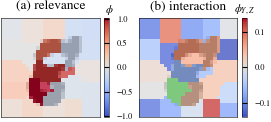

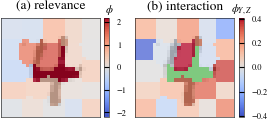

In [19]:
visualize_mnist_attributions(dict_mnist=dict_mnist)